In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('co2').getOrCreate()
import numpy as np
import pandas as pd

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/12 04:19:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [36]:
df = spark.read.csv('CO2data.csv', header=True, inferSchema=True)

In [3]:
df.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- MAKE: string (nullable = true)
 |-- MODEL: string (nullable = true)
 |-- VEHICLE CLASS: string (nullable = true)
 |-- ENGINE SIZE(L): double (nullable = true)
 |-- CYLINDERS: integer (nullable = true)
 |-- TRANSMISSION: string (nullable = true)
 |-- FUEL TYPE: string (nullable = true)
 |-- FUEL CONSUMPTION CITY (L/100 km): double (nullable = true)
 |-- FUEL CONSUMPTION HWY (L/100 km): double (nullable = true)
 |-- FUEL CONSUMPTION COMB (L/100 km): double (nullable = true)
 |-- FUEL CONSUMPTION COMB (mpg): integer (nullable = true)
 |-- CO2 EMISSIONS  (g/km): integer (nullable = true)
 |-- CO2 RATING: integer (nullable = true)
 |-- SMOG RATING: integer (nullable = true)



In [4]:
df.show(truncate=False)

+----+------------+-------------------+-------------+--------------+---------+------------+---------+--------------------------------+-------------------------------+--------------------------------+---------------------------+---------------------+----------+-----------+
|YEAR|MAKE        |MODEL              |VEHICLE CLASS|ENGINE SIZE(L)|CYLINDERS|TRANSMISSION|FUEL TYPE|FUEL CONSUMPTION CITY (L/100 km)|FUEL CONSUMPTION HWY (L/100 km)|FUEL CONSUMPTION COMB (L/100 km)|FUEL CONSUMPTION COMB (mpg)|CO2 EMISSIONS  (g/km)|CO2 RATING|SMOG RATING|
+----+------------+-------------------+-------------+--------------+---------+------------+---------+--------------------------------+-------------------------------+--------------------------------+---------------------------+---------------------+----------+-----------+
|2017|ACURA       |ILX                |COMPACT      |2.4           |4        |AM8         |Z        |9.4                             |6.8                            |8.2            

In [5]:
df.pan = df.toPandas()
df.pan

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km),CO2 RATING,SMOG RATING
0,2017,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.4,6.8,8.2,34,192,7,6
1,2017,ACURA,MDX SH-AWD,SUV-SMALL,3.5,6,AS9,Z,12.6,9.0,11.0,26,259,4,6
2,2017,ACURA,MDX SH-AWD ELITE,SUV-SMALL,3.5,6,AS9,Z,12.2,9.0,10.7,26,251,5,6
3,2017,ACURA,MDX HYBRID AWD,SUV-SMALL,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,6,6
4,2017,ACURA,NSX,TWO-SEATER,3.5,6,AM9,Z,11.1,10.8,11.0,26,261,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,2022,Volvo,XC40 T5 AWD,SUV-Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
6041,2022,Volvo,XC60 B5 AWD,SUV-Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
6042,2022,Volvo,XC60 B6 AWD,SUV-Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
6043,2022,Volvo,XC90 T5 AWD,SUV-Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


array([[<AxesSubplot:title={'center':'FUEL CONSUMPTION COMB (mpg)'}>]],
      dtype=object)

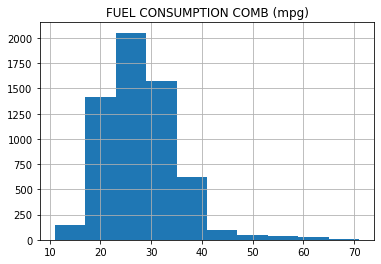

In [6]:
df.pan.hist('FUEL CONSUMPTION COMB (mpg)')

array([[<AxesSubplot:title={'center':'CO2 EMISSIONS  (g/km)'}>]],
      dtype=object)

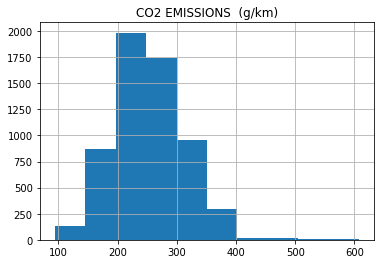

In [7]:
df.pan.hist('CO2 EMISSIONS  (g/km)')

In [8]:
df.pan.isnull().any()

YEAR                                False
MAKE                                False
MODEL                               False
VEHICLE CLASS                       False
ENGINE SIZE(L)                      False
CYLINDERS                           False
TRANSMISSION                        False
FUEL TYPE                           False
FUEL CONSUMPTION CITY (L/100 km)    False
FUEL CONSUMPTION HWY (L/100 km)     False
FUEL CONSUMPTION COMB (L/100 km)    False
FUEL CONSUMPTION COMB (mpg)         False
CO2 EMISSIONS  (g/km)               False
CO2 RATING                          False
SMOG RATING                         False
dtype: bool

In [9]:
df.pan.describe()

,YEAR,ENGINE SIZE(L),CYLINDERS,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km),CO2 RATING,SMOG RATING
count,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000,6045.000000
mean,2019.409264,3.148089,5.631762,12.433912,9.130141,10.946352,27.514309,253.776344,4.562614,4.675434
std,1.702350,1.356136,1.897624,3.383508,2.138759,2.782230,7.402309,60.261598,1.635434,1.790629
min,2017.000000,0.900000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2018.000000,2.000000,4.000000,10.100000,7.600000,9.000000,22.000000,211.000000,3.000000,3.000000
50%,2019.000000,3.000000,6.000000,12.100000,8.800000,10.600000,27.000000,249.000000,5.000000,5.000000
75%,2021.000000,3.700000,6.000000,14.500000,10.400000,12.600000,31.000000,292.000000,5.000000,6.000000
max,2022.000000,8.400000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,8.000000


In [10]:
df1 = df.pan.drop(['YEAR','MODEL','MAKE'],axis=1)
df1 = df1.drop('FUEL CONSUMPTION CITY (L/100 km)',axis=1)
df1 = df1.drop('FUEL CONSUMPTION HWY (L/100 km)',axis=1)
df1 = df1.drop('FUEL CONSUMPTION COMB (L/100 km)',axis=1)

In [11]:
df1

,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km),CO2 RATING,SMOG RATING
0,COMPACT,2.4,4,AM8,Z,34,192,7,6
1,SUV-SMALL,3.5,6,AS9,Z,26,259,4,6
2,SUV-SMALL,3.5,6,AS9,Z,26,251,5,6
3,SUV-SMALL,3.0,6,AM7,Z,31,210,6,6
4,TWO-SEATER,3.5,6,AM9,Z,26,261,4,6
...,...,...,...,...,...,...,...,...,...
6040,SUV-Small,2.0,4,AS8,Z,30,219,5,5
6041,SUV-Small,2.0,4,AS8,Z,30,219,5,5
6042,SUV-Small,2.0,4,AS8,Z,29,232,5,7
6043,SUV-Standard,2.0,4,AS8,Z,28,236,5,5


In [12]:
import numpy as np
import pandas as pd
def three_sigma(ser):
    mean_data=ser.mean()
    std_data=ser.std()
    rule=(mean_data-3*std_data > ser) | (mean_data+3*std_data < ser)
    index=np.arange(ser.shape[0])[rule]
    outliers=ser.iloc[index]
    return outliers

In [13]:
outlier1 = three_sigma(df1['FUEL CONSUMPTION COMB (mpg)'])
clean_data=df1.drop(outlier1.keys())

In [14]:
outlier2 = three_sigma(clean_data['CO2 EMISSIONS  (g/km)'])
clean_data=clean_data.drop(outlier2.keys())

In [15]:
clean_data

,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km),CO2 RATING,SMOG RATING
0,COMPACT,2.4,4,AM8,Z,34,192,7,6
1,SUV-SMALL,3.5,6,AS9,Z,26,259,4,6
2,SUV-SMALL,3.5,6,AS9,Z,26,251,5,6
3,SUV-SMALL,3.0,6,AM7,Z,31,210,6,6
4,TWO-SEATER,3.5,6,AM9,Z,26,261,4,6
...,...,...,...,...,...,...,...,...,...
6040,SUV-Small,2.0,4,AS8,Z,30,219,5,5
6041,SUV-Small,2.0,4,AS8,Z,30,219,5,5
6042,SUV-Small,2.0,4,AS8,Z,29,232,5,7
6043,SUV-Standard,2.0,4,AS8,Z,28,236,5,5


In [16]:
clean_data['VEHICLE CLASS']

0            COMPACT
1          SUV-SMALL
2          SUV-SMALL
3          SUV-SMALL
4         TWO-SEATER
            ...     
6040       SUV-Small
6041       SUV-Small
6042       SUV-Small
6043    SUV-Standard
6044    SUV-Standard
Name: VEHICLE CLASS, Length: 5906, dtype: object

In [17]:
clean_data['VEHICLE CLASS'] = clean_data['VEHICLE CLASS'].str.upper()
clean_data['VEHICLE CLASS']

0            COMPACT
1          SUV-SMALL
2          SUV-SMALL
3          SUV-SMALL
4         TWO-SEATER
            ...     
6040       SUV-SMALL
6041       SUV-SMALL
6042       SUV-SMALL
6043    SUV-STANDARD
6044    SUV-STANDARD
Name: VEHICLE CLASS, Length: 5906, dtype: object

In [18]:
clean_data = clean_data.reset_index(drop=True)

In [19]:
def Split_num_letters(astr):
    nums,letters="",""

    for i in astr:
        
        if i.isdigit():
            nums = nums+i
        elif i.isspace():
            pass
        else:
            letters = letters+i
    return nums,letters

In [20]:
type = []
num = []
for i in range(len(clean_data)):
    nums,letters = Split_num_letters(clean_data['TRANSMISSION'][i])
    num.append(nums)
    type.append(letters)
clean_data['TRANSMISSION TYPE'] = type
clean_data['TRANSMISSION NUM'] = num
clean_data = clean_data.drop('TRANSMISSION',axis=1)
clean_data.head()

,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,FUEL TYPE,FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km),CO2 RATING,SMOG RATING,TRANSMISSION TYPE,TRANSMISSION NUM
0,COMPACT,2.4,4,Z,34,192,7,6,AM,8
1,SUV-SMALL,3.5,6,Z,26,259,4,6,AS,9
2,SUV-SMALL,3.5,6,Z,26,251,5,6,AS,9
3,SUV-SMALL,3.0,6,Z,31,210,6,6,AM,7
4,TWO-SEATER,3.5,6,Z,26,261,4,6,AM,9


In [21]:
Vclass = clean_data['VEHICLE CLASS']
Ttype  = clean_data['TRANSMISSION TYPE']
Ftype = clean_data['FUEL TYPE']

In [22]:
classnum =  Vclass[Vclass.duplicated()==False]
typenum  = Ttype[Ttype.duplicated()==False]
ftypenum  = Ftype[Ftype.duplicated()==False]

In [23]:
classnum = classnum.reset_index(drop=True)
cindex = range(len(classnum))
clist = classnum.values
typenum = typenum.reset_index(drop=True)
tindex = range(len(typenum))
tlist = typenum.values
ftypenum = ftypenum.reset_index(drop=True)
findex = range(len(ftypenum))
flist = ftypenum.values

In [24]:
z = clean_data['VEHICLE CLASS']
x = clean_data['TRANSMISSION TYPE']
c =  clean_data['TRANSMISSION NUM']
v =  clean_data['FUEL TYPE']

In [25]:
z1 = []
z2 = []
z3 = []
z4 = []

In [26]:
for i in range(len(clean_data)):
    z1.append(cindex[np.where(clist==z[i])[0][0]]+1)
    z2.append(tindex[np.where(tlist==x[i])[0][0]]+1)
    z3.append(int(c[i]))
    z4.append(tindex[np.where(flist==v[i])[0][0]]+1)

In [27]:
clean_data['VEHICLE CLASS'] = z1
clean_data['TRANSMISSION TYPE'] = z2
clean_data['TRANSMISSION NUM'] = z3
clean_data['FUEL TYPE'] = z4

In [28]:
clean_data

,VEHICLE CLASS,ENGINE SIZE(L),CYLINDERS,FUEL TYPE,FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km),CO2 RATING,SMOG RATING,TRANSMISSION TYPE,TRANSMISSION NUM
0,1,2.4,4,1,34,192,7,6,1,8
1,2,3.5,6,1,26,259,4,6,2,9
2,2,3.5,6,1,26,251,5,6,2,9
3,2,3.0,6,1,31,210,6,6,1,7
4,3,3.5,6,1,26,261,4,6,1,9
...,...,...,...,...,...,...,...,...,...,...
5901,2,2.0,4,1,30,219,5,5,2,8
5902,2,2.0,4,1,30,219,5,5,2,8
5903,2,2.0,4,1,29,232,5,7,2,8
5904,9,2.0,4,1,28,236,5,5,2,8


In [29]:
values = clean_data.values.tolist()
columns = clean_data.columns.tolist()
data = spark.createDataFrame(values, columns)

In [30]:
data.show(truncate=False)

+-------------+--------------+---------+---------+---------------------------+---------------------+----------+-----------+-----------------+----------------+
|VEHICLE CLASS|ENGINE SIZE(L)|CYLINDERS|FUEL TYPE|FUEL CONSUMPTION COMB (mpg)|CO2 EMISSIONS  (g/km)|CO2 RATING|SMOG RATING|TRANSMISSION TYPE|TRANSMISSION NUM|
+-------------+--------------+---------+---------+---------------------------+---------------------+----------+-----------+-----------------+----------------+
|1.0          |2.4           |4.0      |1.0      |34.0                       |192.0                |7.0       |6.0        |1.0              |8.0             |
|2.0          |3.5           |6.0      |1.0      |26.0                       |259.0                |4.0       |6.0        |2.0              |9.0             |
|2.0          |3.5           |6.0      |1.0      |26.0                       |251.0                |5.0       |6.0        |2.0              |9.0             |
|2.0          |3.0           |6.0      |1.0   

In [31]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
    inputCols=["VEHICLE CLASS", "ENGINE SIZE(L)", 
               "CYLINDERS",'FUEL TYPE',"FUEL CONSUMPTION COMB (mpg)","CO2 EMISSIONS  (g/km)","SMOG RATING","TRANSMISSION TYPE",'TRANSMISSION NUM'],
    outputCol="features")

In [32]:
output = assembler.transform(data)

In [33]:
data = output.select("features",'CO2 RATING')
data.show()

+--------------------+----------+
|            features|CO2 RATING|
+--------------------+----------+
|[1.0,2.4,4.0,1.0,...|       7.0|
|[2.0,3.5,6.0,1.0,...|       4.0|
|[2.0,3.5,6.0,1.0,...|       5.0|
|[2.0,3.0,6.0,1.0,...|       6.0|
|[3.0,3.5,6.0,1.0,...|       4.0|
|[2.0,3.5,6.0,1.0,...|       5.0|
|[4.0,3.5,6.0,1.0,...|       7.0|
|[1.0,2.4,4.0,1.0,...|       6.0|
|[1.0,3.5,6.0,1.0,...|       5.0|
|[3.0,1.8,4.0,1.0,...|       6.0|
|[3.0,1.8,4.0,1.0,...|       6.0|
|[4.0,2.0,4.0,1.0,...|       6.0|
|[4.0,2.0,4.0,1.0,...|       6.0|
|[4.0,2.9,6.0,1.0,...|       4.0|
|[5.0,5.2,12.0,1.0...|       3.0|
|[6.0,6.0,12.0,1.0...|       3.0|
|[5.0,6.0,12.0,1.0...|       2.0|
|[3.0,6.0,12.0,1.0...|       1.0|
|[6.0,2.0,4.0,2.0,...|       7.0|
|[6.0,2.0,4.0,2.0,...|       6.0|
+--------------------+----------+
only showing top 20 rows



In [34]:
from pyspark.ml.feature import ChiSqSelector
selector = ChiSqSelector(numTopFeatures=6,labelCol='CO2 RATING', outputCol="selectedFeatures")
model = selector.fit(data)
model.transform(data).show()
data = model.transform(data)

+--------------------+----------+--------------------+
|            features|CO2 RATING|    selectedFeatures|
+--------------------+----------+--------------------+
|[1.0,2.4,4.0,1.0,...|       7.0|[1.0,2.4,4.0,1.0,...|
|[2.0,3.5,6.0,1.0,...|       4.0|[2.0,3.5,6.0,1.0,...|
|[2.0,3.5,6.0,1.0,...|       5.0|[2.0,3.5,6.0,1.0,...|
|[2.0,3.0,6.0,1.0,...|       6.0|[2.0,3.0,6.0,1.0,...|
|[3.0,3.5,6.0,1.0,...|       4.0|[3.0,3.5,6.0,1.0,...|
|[2.0,3.5,6.0,1.0,...|       5.0|[2.0,3.5,6.0,1.0,...|
|[4.0,3.5,6.0,1.0,...|       7.0|[4.0,3.5,6.0,1.0,...|
|[1.0,2.4,4.0,1.0,...|       6.0|[1.0,2.4,4.0,1.0,...|
|[1.0,3.5,6.0,1.0,...|       5.0|[1.0,3.5,6.0,1.0,...|
|[3.0,1.8,4.0,1.0,...|       6.0|[3.0,1.8,4.0,1.0,...|
|[3.0,1.8,4.0,1.0,...|       6.0|[3.0,1.8,4.0,1.0,...|
|[4.0,2.0,4.0,1.0,...|       6.0|[4.0,2.0,4.0,1.0,...|
|[4.0,2.0,4.0,1.0,...|       6.0|[4.0,2.0,4.0,1.0,...|
|[4.0,2.9,6.0,1.0,...|       4.0|[4.0,2.9,6.0,1.0,...|
|[5.0,5.2,12.0,1.0...|       3.0|[5.0,5.2,12.0,1.0...|
|[6.0,6.0,

In [131]:
data = data.select("selectedFeatures",'CO2 RATING')
splits = data.randomSplit([0.7, 0.3], 1234)
train = splits[0]
test = splits[1]
layers = [6, 8,8, 10]

In [132]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import (RandomForestClassifier, GBTClassifier, DecisionTreeClassifier)
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
trainer = MultilayerPerceptronClassifier(maxIter=100, layers=layers, blockSize=128, seed=20,labelCol='CO2 RATING',featuresCol='selectedFeatures')

In [133]:
model = trainer.fit(train)

22/10/12 04:48:36 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/10/12 04:48:36 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [134]:
result = model.transform(test)
evaluator1 = MulticlassClassificationEvaluator(labelCol='CO2 RATING', predictionCol="prediction", metricName="accuracy")
accuracy1 = evaluator1.evaluate(result)
print("Test Error = %g" % (1.0 - accuracy1))

Test Error = 0.757647


In [124]:
rf = RandomForestClassifier(labelCol='CO2 RATING',featuresCol='selectedFeatures',numTrees=20)

In [125]:
model_rf = rf.fit(train)

In [126]:
prediction_rf = model_rf.transform(test)

In [127]:
evaluator2 = MulticlassClassificationEvaluator(labelCol='CO2 RATING', predictionCol="prediction", metricName="accuracy")
accuracy2 = evaluator2.evaluate(prediction_rf)
print("Test Error = %g" % (1.0 - accuracy2))

Test Error = 0.115294


In [129]:
prediction_rf.show()

+--------------------+----------+--------------------+--------------------+----------+
|    selectedFeatures|CO2 RATING|       rawPrediction|         probability|prediction|
+--------------------+----------+--------------------+--------------------+----------+
|[1.0,1.0,3.0,2.0,...|       7.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.0,3.0,2.0,...|       7.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.2,3.0,2.0,...|       8.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       8.0|
|[1.0,1.4,4.0,2.0,...|       7.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.4,4.0,2.0,...|       8.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.4,4.0,2.0,...|       8.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.4,4.0,2.0,...|       8.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.4,4.0,2.0,...|       7.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.4,4.0,2.0,...|       7.0|[0.0,0.0,0

In [141]:
rf1 = RandomForestClassifier(labelCol='CO2 RATING',featuresCol='selectedFeatures',numTrees=20,maxDepth=10,featureSubsetStrategy="auto")

In [142]:
model_rf = rf1.fit(train)

22/10/12 05:00:18 WARN DAGScheduler: Broadcasting large task binary with size 1257.9 KiB
22/10/12 05:00:19 WARN DAGScheduler: Broadcasting large task binary with size 1677.3 KiB


In [143]:
prediction_rf = model_rf.transform(test)

In [144]:
evaluator2 = MulticlassClassificationEvaluator(labelCol='CO2 RATING', predictionCol="prediction", metricName="accuracy")
accuracy2 = evaluator2.evaluate(prediction_rf)
print("Test Error = %g" % (1.0 - accuracy2))

Test Error = 0.109412


In [145]:
prediction_rf.show()

+--------------------+----------+--------------------+--------------------+----------+
|    selectedFeatures|CO2 RATING|       rawPrediction|         probability|prediction|
+--------------------+----------+--------------------+--------------------+----------+
|[1.0,1.0,3.0,2.0,...|       7.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.0,3.0,2.0,...|       7.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.2,3.0,2.0,...|       8.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       8.0|
|[1.0,1.4,4.0,2.0,...|       7.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.4,4.0,2.0,...|       8.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.4,4.0,2.0,...|       8.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.4,4.0,2.0,...|       8.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.4,4.0,2.0,...|       7.0|[0.0,0.0,0.0,0.0,...|[0.0,0.0,0.0,0.0,...|       7.0|
|[1.0,1.4,4.0,2.0,...|       7.0|[0.0,0.0,0

In [153]:
trainingSummary = model_rf.summary
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
 print(objective)


objectiveHistory:
0.0


In [154]:
print("False positive rate by label:")
for i,rate in enumerate(trainingSummary.falsePositiveRateByLabel):
 print("label %d: %s" % (i, rate))

False positive rate by label:
label 0: 0.0036231884057971015
label 1: 0.008820564516129033
label 2: 0.026540843409023886
label 3: 0.02955818294959552
label 4: 0.01602878639188747
label 5: 0.012706136793728035
label 6: 0.011920186576833377
label 7: 0.0031484620973601355
label 8: 0.00023860653781913624


In [155]:
print("True positive rate by label:")
for i,rate in enumerate(trainingSummary.truePositiveRateByLabel):
 print("label %d: %s" % (i, rate))

True positive rate by label:
label 0: 0.9848484848484849
label 1: 0.9243697478991597
label 2: 0.9386503067484663
label 3: 0.8911290322580645
label 4: 0.9216710182767625
label 5: 0.9013806706114399
label 6: 0.8674351585014409
label 7: 0.6883116883116883
label 8: 0.7333333333333333


In [156]:
print("Precision by label:")
for i,rate in enumerate(trainingSummary.precisionByLabel):
 print("label %d: %s" % (i, rate))

Precision by label:
label 0: 0.8125
label 1: 0.8627450980392157
label 2: 0.8947368421052632
label 3: 0.9029622063329928
label 4: 0.9557761732851986
label 5: 0.9067460317460317
label 6: 0.8674351585014409
label 7: 0.803030303030303
label 8: 0.9166666666666666


In [158]:
print("Recall by label:")
for i,rate in enumerate(trainingSummary.recallByLabel):
 print("label %d: %s" % (i, rate))

Recall by label:
label 0: 0.9848484848484849
label 1: 0.9243697478991597
label 2: 0.9386503067484663
label 3: 0.8911290322580645
label 4: 0.9216710182767625
label 5: 0.9013806706114399
label 6: 0.8674351585014409
label 7: 0.6883116883116883
label 8: 0.7333333333333333


In [157]:
print("F-measure by label:")
for i,rate in enumerate(trainingSummary.fMeasureByLabel()):
 print("label %d: %s" % (i, rate))

F-measure by label:
label 0: 0.8904109589041096
label 1: 0.8924949290060852
label 2: 0.9161676646706587
label 3: 0.8970065956367326
label 4: 0.9384138236597253
label 5: 0.904055390702275
label 6: 0.867435158501441
label 7: 0.7412587412587411
label 8: 0.8148148148148148


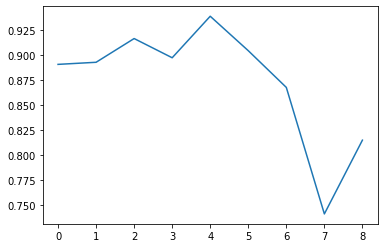

In [165]:
plt.plot(trainingSummary.fMeasureByLabel())

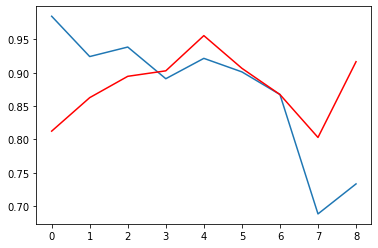

In [170]:
plt.plot(trainingSummary.recallByLabel)
plt.plot(trainingSummary.precisionByLabel,'red')

In [182]:
rf3 = RandomForestClassifier(labelCol='CO2 RATING',featuresCol='selectedFeatures',numTrees=20,maxDepth=20,featureSubsetStrategy="auto")
model_rf = rf3.fit(train)
prediction_rf = model_rf.transform(test)
evaluator3 = MulticlassClassificationEvaluator(labelCol='CO2 RATING', predictionCol="prediction", metricName="accuracy")
accuracy3 = evaluator3.evaluate(prediction_rf)
print("Test Error = %g" % (1.0 - accuracy3))

22/10/12 06:17:17 WARN DAGScheduler: Broadcasting large task binary with size 1315.7 KiB
22/10/12 06:17:17 WARN DAGScheduler: Broadcasting large task binary with size 1752.6 KiB
22/10/12 06:17:18 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
22/10/12 06:17:18 WARN DAGScheduler: Broadcasting large task binary with size 2.5 MiB
22/10/12 06:17:18 WARN DAGScheduler: Broadcasting large task binary with size 2.7 MiB
22/10/12 06:17:19 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
22/10/12 06:17:19 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
22/10/12 06:17:20 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
22/10/12 06:17:20 WARN DAGScheduler: Broadcasting large task binary with size 3.1 MiB
22/10/12 06:17:20 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
22/10/12 06:17:21 WARN DAGScheduler: Broadcasting large task binary with size 1035.5 KiB
22/10/12 06:17:21 WARN DAGScheduler: Broadcas

Test Error = 0.103723


In [181]:
rf4 = RandomForestClassifier(labelCol='CO2 RATING',featuresCol='selectedFeatures',numTrees=10,maxDepth=10,featureSubsetStrategy="auto")
model_rf = rf4.fit(train)
prediction_rf = model_rf.transform(test)
evaluator4 = MulticlassClassificationEvaluator(labelCol='CO2 RATING', predictionCol="prediction", metricName="accuracy")
accuracy4 = evaluator4.evaluate(prediction_rf)
print("Test Error = %g" % (1.0 - accuracy4))

Test Error = 0.10195


In [179]:
data = output.select("features",'CO2 RATING')
selector = ChiSqSelector(numTopFeatures=6,labelCol='CO2 RATING', outputCol="selectedFeatures")
model = selector.fit(data)
model.transform(data).show()
data = model.transform(data)
data = data.select("selectedFeatures",'CO2 RATING')
splits = data.randomSplit([0.8, 0.2], 1234)
train = splits[0]
test = splits[1]

+--------------------+----------+--------------------+
|            features|CO2 RATING|    selectedFeatures|
+--------------------+----------+--------------------+
|[1.0,2.4,4.0,1.0,...|       7.0|[1.0,2.4,4.0,1.0,...|
|[2.0,3.5,6.0,1.0,...|       4.0|[2.0,3.5,6.0,1.0,...|
|[2.0,3.5,6.0,1.0,...|       5.0|[2.0,3.5,6.0,1.0,...|
|[2.0,3.0,6.0,1.0,...|       6.0|[2.0,3.0,6.0,1.0,...|
|[3.0,3.5,6.0,1.0,...|       4.0|[3.0,3.5,6.0,1.0,...|
|[2.0,3.5,6.0,1.0,...|       5.0|[2.0,3.5,6.0,1.0,...|
|[4.0,3.5,6.0,1.0,...|       7.0|[4.0,3.5,6.0,1.0,...|
|[1.0,2.4,4.0,1.0,...|       6.0|[1.0,2.4,4.0,1.0,...|
|[1.0,3.5,6.0,1.0,...|       5.0|[1.0,3.5,6.0,1.0,...|
|[3.0,1.8,4.0,1.0,...|       6.0|[3.0,1.8,4.0,1.0,...|
|[3.0,1.8,4.0,1.0,...|       6.0|[3.0,1.8,4.0,1.0,...|
|[4.0,2.0,4.0,1.0,...|       6.0|[4.0,2.0,4.0,1.0,...|
|[4.0,2.0,4.0,1.0,...|       6.0|[4.0,2.0,4.0,1.0,...|
|[4.0,2.9,6.0,1.0,...|       4.0|[4.0,2.9,6.0,1.0,...|
|[5.0,5.2,12.0,1.0...|       3.0|[5.0,5.2,12.0,1.0...|
|[6.0,6.0,

In [180]:
rf5 = RandomForestClassifier(labelCol='CO2 RATING',featuresCol='selectedFeatures',numTrees=20,maxDepth=10,featureSubsetStrategy="auto")
model_rf = rf5.fit(train)
prediction_rf = model_rf.transform(test)
evaluator5 = MulticlassClassificationEvaluator(labelCol='CO2 RATING', predictionCol="prediction", metricName="accuracy")
accuracy5 = evaluator4.evaluate(prediction_rf)
print("Test Error = %g" % (1.0 - accuracy5))

22/10/12 06:15:59 WARN DAGScheduler: Broadcasting large task binary with size 1315.7 KiB
22/10/12 06:15:59 WARN DAGScheduler: Broadcasting large task binary with size 1752.6 KiB


Test Error = 0.102837
